In [54]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pyqg
from time import time
import os
import glob
from pyqg_generative.models.ols_model import OLSModel
from pyqg_generative.models.mean_var_model import MeanVarModel
from pyqg_generative.models.cgan_regression import CGANRegression
from pyqg_generative.tools.stochastic_pyqg import stochastic_QGModel
from pyqg_generative.tools.spectral_tools import spectrum
from pyqg_generative.tools.comparison_tools import *
import pyqg_parameterization_benchmarks as ppb
import json
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
for folder in folder_iterator(return_blowup=True):
    nfiles = len(glob.glob(os.path.join(folder, '*.nc')))
    if nfiles < 10:
        print('Blow up experiment:', folder)
        print(nfiles)

Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/MeanVarModel/eddy-AR1-24
2
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/MeanVarModel/eddy-AR1-36
0
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/MeanVarModel/eddy-AR1-48
0
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/MeanVarModel/eddy-constant-48
9
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-96/MeanVarModel/eddy-AR1-24
9
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-96/MeanVarModel/eddy-AR1-36
8
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-96/MeanVarModel/eddy-AR1-48
6
Blow up experiment: /scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-96/MeanVarModel/eddy-constant-12


In [66]:
highres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/*.nc', combine='nested', concat_dim='run').load()
lowres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc', combine='nested', concat_dim='run').load()

In [67]:
ds = coarsegrain_reference_dataset(highres, 64, 'Operator1')

var =  q
var =  u
var =  v
var =  psi


In [86]:
model = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-64/CGANRegression/eddy-constant-0/*.nc', combine='nested', concat_dim='run')

In [122]:
%time ppb.diagnostic_similarities(model, ds, lowres, T=128)

CPU times: user 1min 10s, sys: 5.16 s, total: 1min 15s
Wall time: 1min 15s


{'distrib_diff_q1': 0.858958848737749,
 'distrib_diff_q2': 0.6829852218793004,
 'distrib_diff_u1': 0.8365561707176606,
 'distrib_diff_u2': 0.8359515205384592,
 'distrib_diff_v1': 0.8239561245227166,
 'distrib_diff_v2': 0.771637605692762,
 'distrib_diff_KE1': 0.8146259291083773,
 'distrib_diff_KE2': 0.7922537680920104,
 'distrib_diff_Ens1': 0.4273043973838644,
 'distrib_diff_Ens2': 0.9046362065639878,
 'spectral_diff_KEspec1': 0.7022520926440158,
 'spectral_diff_KEspec2': 0.7462702366351059,
 'spectral_diff_KEflux': 0.67189171244816,
 'spectral_diff_APEflux': 0.6747191576393875,
 'spectral_diff_APEgenspec': 0.7034482416054892,
 'spectral_diff_KEfrictionspec': 0.7462701065564776}

In [123]:
%time ppb.diagnostic_similarities(model, highres, lowres, T=1)

CPU times: user 4.36 s, sys: 187 ms, total: 4.55 s
Wall time: 4.35 s


{'distrib_diff_q1': 0.4782988103506248,
 'distrib_diff_q2': 0.5478571219381726,
 'distrib_diff_u1': 0.6549958889167478,
 'distrib_diff_u2': 0.5696289673682191,
 'distrib_diff_v1': 0.6647169852138799,
 'distrib_diff_v2': 0.6201911718994578,
 'distrib_diff_KE1': 0.6833885827469166,
 'distrib_diff_KE2': 0.5772909989774108,
 'distrib_diff_Ens1': 0.25183050288287756,
 'distrib_diff_Ens2': 0.615745445766283,
 'spectral_diff_KEspec1': 0.7022520686893807,
 'spectral_diff_KEspec2': 0.7462702061045448,
 'spectral_diff_KEflux': 0.6718916355424516,
 'spectral_diff_APEflux': 0.6747191837748199,
 'spectral_diff_APEgenspec': 0.7034481553888974,
 'spectral_diff_KEfrictionspec': 0.7462701927170194}

# Coarsegraining relative to all present filters

In [2]:
highres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/*.nc', combine='nested', concat_dim='run').load()

In [3]:
for resolution in [32, 48, 64, 96]:
    for operator in ['Operator1', 'Operator2']:
        file = '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/'+operator+'-'+str(resolution)+'.nc'
        print(file)
        %time coarsegrain_reference_dataset(highres, resolution, operator).to_netcdf(file)

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-32.nc
CPU times: user 1min 17s, sys: 0 ns, total: 1min 17s
Wall time: 1min 17s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-32.nc
CPU times: user 1min 17s, sys: 119 ms, total: 1min 17s
Wall time: 1min 17s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-48.nc
CPU times: user 1min 28s, sys: 591 ms, total: 1min 28s
Wall time: 1min 29s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-48.nc
CPU times: user 1min 28s, sys: 584 ms, total: 1min 29s
Wall time: 1min 29s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc
CPU times: user 1min 34s, sys: 916 ms, total: 1min 35s
Wall time: 1min 36s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc
CPU times: user 1min 34s, sys: 930 ms, total: 1min 35s
Wall time: 1min 36s


In [2]:
similarity = {}
for model_folder, reference_folder, baseline_folder, key in folder_iterator(return_reference=True):
    model = xr.open_mfdataset(os.path.join(model_folder, '*.nc'), combine='nested', concat_dim='run').load()
    reference = xr.open_dataset(reference_folder).load()
    baseline = xr.open_mfdataset(baseline_folder, combine='nested', concat_dim='run').load()
    print(model_folder, reference_folder, baseline_folder, key, sep='\n')
    %time similarity[key] = ppb.diagnostic_similarities(model, reference, baseline, T=128)

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/OLSModel/eddy-constant-0
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-48.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/*.nc
Operator1-48/OLSModel/eddy-constant-0
CPU times: user 39.6 s, sys: 2.2 s, total: 41.8 s
Wall time: 41.9 s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/OLSModel/eddy-constant-12
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-48.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/*.nc
Operator1-48/OLSModel/eddy-constant-12
CPU times: user 39.2 s, sys: 2.29 s, total: 41.5 s
Wall time: 41.6 s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-48/OLSModel/eddy-constant-24
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-48.nc
/scratch/pp2681/pyqg_generative/Reference-

CPU times: user 39.6 s, sys: 1.11 s, total: 40.7 s
Wall time: 40.8 s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-48/OLSModel/eddy-constant-36
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-48.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/*.nc
Operator2-48/OLSModel/eddy-constant-36
CPU times: user 39.7 s, sys: 546 ms, total: 40.3 s
Wall time: 40.4 s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-48/OLSModel/eddy-constant-48
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-48.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/*.nc
Operator2-48/OLSModel/eddy-constant-48
CPU times: user 40 s, sys: 1.28 s, total: 41.3 s
Wall time: 41.5 s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-48/MeanVarModel/eddy-AR1-12
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/ref

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-64/OLSModel/eddy-constant-12
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator1-64/OLSModel/eddy-constant-12
CPU times: user 1min 19s, sys: 3.25 s, total: 1min 22s
Wall time: 1min 23s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-64/OLSModel/eddy-constant-24
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator1-64/OLSModel/eddy-constant-24
CPU times: user 1min 17s, sys: 2.09 s, total: 1min 19s
Wall time: 1min 20s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-64/OLSModel/eddy-constant-36
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc
/scratch/pp2681/pyqg_genera

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator1-64/CGANRegression/eddy-constant-48
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator1-64/CGANRegression/eddy-constant-48
CPU times: user 1min 14s, sys: 3.04 s, total: 1min 17s
Wall time: 1min 17s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/OLSModel/eddy-constant-0
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator2-64/OLSModel/eddy-constant-0
CPU times: user 1min 13s, sys: 4.29 s, total: 1min 17s
Wall time: 1min 18s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/OLSModel/eddy-constant-12
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc
/scratch/pp2681/p

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/CGANRegression/eddy-constant-24
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator2-64/CGANRegression/eddy-constant-24
CPU times: user 1min 9s, sys: 4.37 s, total: 1min 13s
Wall time: 1min 14s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/CGANRegression/eddy-constant-36
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc
Operator2-64/CGANRegression/eddy-constant-36
CPU times: user 1min 10s, sys: 2.03 s, total: 1min 12s
Wall time: 1min 12s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/CGANRegression/eddy-constant-48
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.n

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-96/OLSModel/eddy-constant-12
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-96.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_96/*.nc
Operator2-96/OLSModel/eddy-constant-12
CPU times: user 3min 2s, sys: 10.3 s, total: 3min 12s
Wall time: 3min 13s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-96/OLSModel/eddy-constant-24
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-96.nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_96/*.nc
Operator2-96/OLSModel/eddy-constant-24
CPU times: user 3min 2s, sys: 10.6 s, total: 3min 13s
Wall time: 3min 14s
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-96/OLSModel/eddy-constant-36
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-96.nc
/scratch/pp2681/pyqg_generati

In [5]:
#with open('similarity.json', 'w') as file:
#    json.dump(similarity, file)

# Find best time sampling for each model

In [6]:
with open('similarity.json', 'r') as file:
    similarity = json.load(file)

In [104]:
score_for_model(similarity, spectral_score, 64, 'Operator2', 'OLSModel')

{'Operator2-64/OLSModel/eddy-constant-0': -0.27476220370502813,
 'Operator2-64/OLSModel/eddy-constant-12': -0.22704284129149252,
 'Operator2-64/OLSModel/eddy-constant-24': -0.0035999040568338394,
 'Operator2-64/OLSModel/eddy-constant-36': 0.2496631658894434,
 'Operator2-64/OLSModel/eddy-constant-48': 0.41565545345585314}

In [105]:
similarity['Operator2-64/OLSModel/eddy-constant-0']

{'distrib_diff_q1': -0.15511003951137514,
 'distrib_diff_q2': -9.315347266015813,
 'distrib_diff_u1': -0.6190373787581256,
 'distrib_diff_u2': -0.7306884556765085,
 'distrib_diff_v1': -0.9951685507318422,
 'distrib_diff_v2': -1.1448328106838446,
 'distrib_diff_KE1': -0.7784922795965965,
 'distrib_diff_KE2': -1.040875224954561,
 'distrib_diff_Ens1': 0.8071757165237108,
 'distrib_diff_Ens2': 0.031482827012242254,
 'spectral_diff_KEspec1': -0.09429934783592597,
 'spectral_diff_KEspec2': -0.01020985827870291,
 'spectral_diff_KEflux': -0.47424086006512645,
 'spectral_diff_APEflux': -1.0842382494609253,
 'spectral_diff_APEgenspec': 0.0246249931775272,
 'spectral_diff_KEfrictionspec': -0.010209899767015251}

In [108]:
highres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/[0-9].nc', combine='nested', concat_dim='run').load()

In [136]:
lowres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/*.nc', combine='nested', concat_dim='run').load()
model = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-64/OLSModel/eddy-constant-0/*.nc', combine='nested', concat_dim='run')
downscale = xr.open_dataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-64.nc')

In [137]:
ppb.diagnostic_similarities(model, downscale, lowres, T=1)

{'distrib_diff_q1': -0.33327162099054775,
 'distrib_diff_q2': -1.723203028712612,
 'distrib_diff_u1': -0.4108609857898342,
 'distrib_diff_u2': -0.9128078053223632,
 'distrib_diff_v1': -4.5996577723012715,
 'distrib_diff_v2': -0.4809383846880382,
 'distrib_diff_KE1': -1.39429225555276,
 'distrib_diff_KE2': -0.681147585990564,
 'distrib_diff_Ens1': 0.7828602129583967,
 'distrib_diff_Ens2': -0.8860215510498264,
 'spectral_diff_KEspec1': -0.09429935095113584,
 'spectral_diff_KEspec2': -0.01020989677760542,
 'spectral_diff_KEflux': -0.47424086006512645,
 'spectral_diff_APEflux': -1.0842382491584477,
 'spectral_diff_APEgenspec': 0.02462500999726691,
 'spectral_diff_KEfrictionspec': -0.01020991894929879}

(0.0001, 10.0)

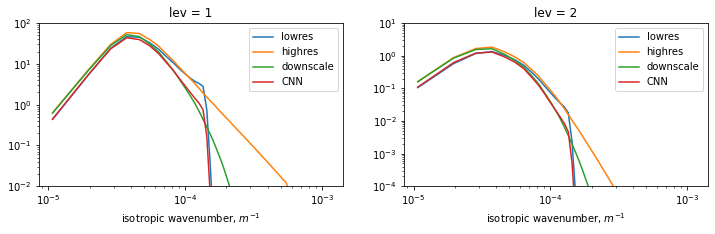

In [140]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
spectrum(averaging='True')(lowres.u).isel(lev=0).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=0).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=0).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=0).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-2, 1e+2])
plt.subplot(1,2,2)
spectrum(averaging='True')(lowres.u).isel(lev=1).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=1).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=1).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=1).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-4, 1e+1])

In [141]:
lowres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/*.nc', combine='nested', concat_dim='run').load()
model = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-48/OLSModel/eddy-constant-0/*.nc', combine='nested', concat_dim='run')
downscale = xr.open_dataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-48.nc')

(0.0001, 10.0)

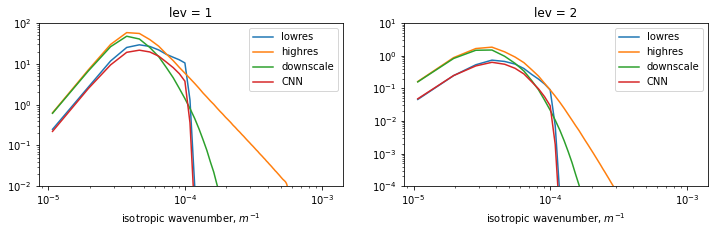

In [142]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
spectrum(averaging='True')(lowres.u).isel(lev=0).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=0).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=0).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=0).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-2, 1e+2])
plt.subplot(1,2,2)
spectrum(averaging='True')(lowres.u).isel(lev=1).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=1).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=1).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=1).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-4, 1e+1])

In [143]:
lowres = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_96/*.nc', combine='nested', concat_dim='run').load()
model = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models/Operator2-96/OLSModel/eddy-constant-0/*.nc', combine='nested', concat_dim='run')
downscale = xr.open_dataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator2-96.nc')

(0.0001, 10.0)

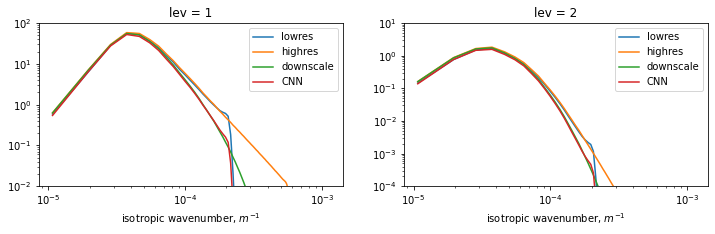

In [144]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
spectrum(averaging='True')(lowres.u).isel(lev=0).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=0).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=0).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=0).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-2, 1e+2])
plt.subplot(1,2,2)
spectrum(averaging='True')(lowres.u).isel(lev=1).plot(xscale='log', yscale='log', label='lowres')
spectrum(averaging='True')(highres.u).isel(lev=1).plot(xscale='log', yscale='log', label='highres')
spectrum(averaging='True')(downscale.u).isel(lev=1).plot(xscale='log', yscale='log', label='downscale')
spectrum(averaging='True')(model.u).isel(lev=1).plot(xscale='log', yscale='log', label='CNN')
plt.legend()
plt.ylim([1e-4, 1e+1])